In [1]:
import nltk
import re

import pandas as pd
import numpy as np

import pickle as pk

import warnings
warnings.filterwarnings('ignore')

from bs4 import BeautifulSoup
import unicodedata

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import ne_chunk

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
data = "Atlas Copco\nAnnual report\n2019Atlas Copco \nAtlas Copco Group  Inside front cover\nPresident and CEO 2\nTHIS IS ATLAS COPCO\nThis section contains Atlas Copco’s vision, mission,  \nstrategy, structure and governance, how we do  \nbusiness and create value for all stakeholders. 5\nOur goals 11\nTHE YEAR IN REVIEW  \nAdministration report\nThis section describes Atlas Copco’s annual  \nperformance and achievements. 13\nCompressor Technique 22\nVacuum Technique 25\nIndustrial Technique 28\nPower Technique 31\nDelivering lasting value in a sustainable way 34\nProducts and service 35\nPeople 36\nSafety and well-being 39\nEthics 40\nEnvironment 42\nRisks, risk management and opportunities 44\nThe Atlas Copco share 49\nCorporate governance  51\nOUR FINANCIAL RESULTS\nFinancial statements (Group) 62\nNotes (Group) 67\nFinancial statements (Parent) 111\nNotes (Parent) 113\nSignatures of the Board of Directors 125\nAudit report 126\nFinancial de/f_initions 129\nSustainability notes (Group) 130\nGRI index 136\nAuditor’s Limited Assurance Report on  \nAtlas Copco AB’s sustainability report 141\nGoal performance 142\nThree years in summary 143\nContacts 144CONTENTS\nThe audited annual accounts and consolidated accoun ts can be found  \non pages 13–39, 44–48 and 62–125. The corporate governance report  \nexamined by the auditors can be found on pages 51–61.\nSustainability information that has been reviewed by the auditors can  \nbe found on pages 5–12, 34–43 and 130–140.… believes in delivering innovative products, reliable services and pr o/f_itable growth while  \nbeing a responsible corporate citizen. This annual report re/f_lects Atla s Copco’s mission of  \ncreating sustainable, pro/f_itable growth and it integrates /f_inancial, s ustainability and governance  \ninformation in order to describe the Group in a comprehensive and cohesiv e manner.  \nGRI Standards and external review\nAtlas Copco reports its sustainability work for 2019 according to  \nGRI Standards, Global Reporting Initiative’s reporting guideli nes, level \nCore. Deloitte has reviewed the report and veri/f_ied this level, see page \n141. More information can be found at:  www.atlascopcogroup.com.\nThe sustainability report 2019 is prepared in accordance with the  \nAnnual Accounts Act.\nNotice    \nThe amounts are presented in MSEK unless otherwise  indicated  \nand numbers in parentheses represent comparative /f_igures for the  \npreceding year. The /f_igures presented in this report refer to continuing \noperations unless otherwise stated.  \nForward-looking statements    \nSome statements in this report are forward-looking,  and the actual out-\ncomes could be materially di/uniFB00erent. In addition to the factors explicitly \ndiscussed, other factors could have a material e/uniFB00ec t on the actual  \noutcomes. Such factors include, but are not limited  to, general business \nconditions, /f_luctuations in exchange rates and inter est rates, political  \ndevelopments, the impact of competing products and their pricing,  \nproduct development, commercialization and technolo gical di/uniFB03culties,  \ninterruptions in supply, and major customer credit losses.\nAtlas Copco AB is a public company. Atlas Copco AB and its subsidiaries \nare sometimes referred to as the Atlas Copco Group,  the Group, or  \nAtlas Copco. Atlas Copco AB is also sometimes refer red to as Atlas Copco.  \nAny mentioning of the Board of Directors or the Boa rd refers to the  \nBoard of Directors of Atlas Copco AB.Industrial ideas drive  \ndevelopment\nAtlas Copco has been turning \ngreat ideas into business-critical \nbene/f_its since 1873. By listening \nto our customers and knowing \ntheir needs, we deliver value and \ninnovate with the future in mind.  \nCover image:\nElectrical components used in \nindustrial assembly solutions  \ninspected in an Atlas Copco  \nR&D laboratory.Revenues 2019:\nMSEK 48 286The Compressor Technique business area provides \ncompressed air solutions; industrial compressors, \ngas and process compressors and expanders, air \nand gas treatment equipment and air manage -\nment systems. The business area has a global \nservice network and innovates for sustainable \nproductivity, mainly for the manufacturing and \nprocess industries. Principal product development \nand manufacturing units are located in Belgium, \nthe United States, China, India, Germany and Italy.\nPage 22COMPRESSOR TECHNIQUE\nRevenues by region Revenues by region\nShare of revenues Share of revenues\nOrders received by  \ncustomer categoryOrders received by  \ncustomer category012 00024 00036 00048 00060 000\n2019 2018 2017 2016*0510152025MSEK %\n025 00050 00075 000100 000125 000\n2019 2018 2017 2016*0510152025MSEK %Orders received     Revenues    \nOperating margin     Orders received     Revenues    \nOperating margin    \nAsia/Oceania,  35% North \nAmerica,  25%\nAfrica /\nMiddle  East, 5%\nEurope, 31%Sout h \nAmerica,  4%Asia/Oceania,  31% N orth\nAmerica,  22%\nAfrica /\nMiddle  East, 7%\nEurope, 35%Sout h\nAmerica,  5%\nEquipm ent,  64% Service, 36% Service, 43% Equ ipment, 57%\nOther, 13% General manu-\nfacturing, 22%\nConstruction,  12%Service, 7%\nProcess industry, 20%Electronics, 16%\nMotor vehicle, 10%Other, 17% General manu-\nfacturing, 27%\nConstruction, 14%Service, 11%\nProcess industry, 28% Motor vehicle, 1%Electronics and \nelectrical, 2%Atlas Copco\n– a decentralized group  \nwith four business areas\n* 2016 /f_igures are best estimated numbers, as the e/uniFB00ects of the distribution of Epiroc and restatements for IFRS 15 are not fully reconciled.GROUP\nRevenues 2019:\nMSEK 103 756The Atlas Copco Group is a world-\nleading provider of sustain-\nable productivity solutions. The \nGroup o/uniFB00ers customers innova-\ntive compressors, air treatment \nsystems, vacuum solutions, indus-\ntrial power tools and assembly \nsystems, and power and /f_low \nsolutions. Atlas Copco develops \nproducts and services focused on \nproductivity, energy e/uniFB03ciency, \nsafety and ergonomics. \nThe company was founded in 1873, \nis based in Stockholm, Sweden,  \nand has a global reach spanning \nmore than 180 countries.  \nIn 2019, Atlas Copco had revenues \nof BSEK 104 (BEUR 10) and about \n39/uni00A0000 employees at year end.Revenues 2019:\nMSEK 23 570The Vacuum Technique business area provides \nvacuum products, exhaust management systems, \nvalves and related products. The main markets \nserved are semiconductor and scienti/f_ic as well \nas a wide range of industrial segments including \nchemical process industries, food packaging \nand paper handling. The business area has a \nglobal service network and innovates for sustain -\nable productivity in order to further improve its \ncustomers’ performance. Principal product deve l-\nopment and manufacturing units are located in  \nthe United States, Mexico, United Kingdom, Czech \nRepublic, Germany, South Korea, China and Japan.\nPage 25VACUUM TECHNIQUE\nThe Power Technique business area provides air, \npower and /f_low solutions through products such \nas mobile compressors, pumps, light towers and \ngenerators, along with a number of complemen -\ntary products. It also o/uniFB00ers specialty rental and \nprovides services through a dedicated, global \nnetwork. The business area innovates for sustain -\nable productivity across multiple industries, \nincluding construction, manufacturing, oil and gas \nand exploration drilling. Principal product devel -\nopment and manufacturing units are located in \nBelgium, Spain, the United States, China and India.       \nPage 31The Industrial Technique business area provides \nindustrial power tools and systems, industrial \nassembly solutions, quality assurance products, \nsoftware and service through a global network. The \nbusiness area innovates for sustainable productivit y \nfor customers in the automotive and general indus -\ntries, maintenance and vehicle service. Principal \nproduct development and manufacturing units are \nlocated in Sweden, Germany, Hungary, the United \nStates, United Kingdom, France and Japan.\nPage 28INDUSTRIAL TECHNIQUE POWER TECHNIQUE\nRevenues by region\nShare of revenues\nOrders received by  \ncustomer category05 00010 00015 00020 00025 000\n2019 2018 2017 2016*0510152025MSEK %Orders received     Revenues    \nOperating margin     \nRevenues by region Revenues by region\nShare of revenues Share of revenues05 00010 00015 00020 00025 000\n2019 2018 2017 2016*0510152025MSEK %\n05 00010 00015 00020 00025 000\n2019 2018 2017 2016*0510152025MSEK %\nOrders received by  \ncustomer categoryOrders received by  \ncustomer categoryOrders received     Revenues    \nOperating margin     Orders received     Revenues    \nOperating margin     \n*  2016 /f_igures are best estimated numbers, as the e /uniFB00ects of the distribution of Epiroc and restatement s for IFRS 15 are not fully reconciled.Asia/Oceania,  58% North\nAmerica,  25%\nAfrica/\nMiddle  East, 2% Europe, 15%Asia/Oceania,  26% North America,  \n31%\nAfrica /\nMiddle  East, 2%\nEurope, 38%Sout h \nAmerica,  3%Asia/Oceania, 22 % N orth \nAmerica, 25%\nAfrica/\nMiddle East,  12%\nEurope, 35%South \nAmerica, 6%\nServ ice, 25% Equipment, 75 % Service, 28 % Equipment, 72% Service, 11% Equipme nt, 58 %\nService (specialty \nrental), 31%\nOther, 4% General manu-\nfacturing, 13%\nProcess \nindustry, 18% Electronics, 65%Other, 11% General manu-\nfacturing, 22%\nConstruction, 6%Service, 6%\nElectronics, 2%\nMotor vehicle, 53%General manu-\nfacturing, 22%Othe r, 21%\nConstruction, 37%Service, 5%\nProcess \nindustry,  15%Revenues 2019:\nMSEK 18 712Revenues 2019:\nMSEK 13 915*  2016 /f_igures are best estimated numbers, as the e /uniFB00ects of the distribution  \nof Epiroc and restatements for IFRS 15 are not full y reconciled.\nOrders received and  \nrevenues\n020 00040 00060 00080 000100 000120 000\n2019 2018 2017 2016*Return on capital employed  \nand operating margin\n05101520253035\n2019 2018 2017 2016*%\n  Orders received, MSEK\n  Revenues, MSEK   Return on capital employed, %\n  Operating margin, %Atlas Copco 2019 \n– a record year\nRevenues: MSEK 103 756 (+9%)\nReturn on capital employed: 30%\nOperating margin: 21.1%2 Atlas Copco 2019PRESIDENT AND CEO\nDelivering long-term growth and  \ncustomer value in a sustainable way\nRevenues, orders received and operating pro/f_it reach ed all-time high  \nduring 2019. It was also a year when we welcomed mo re new companies  \ninto the Group through acquisitions than any year b efore. \nMats Rahmström, President and CEO of \nthe Atlas Copco Group, 2019 was a year \nwith record-high revenues and orders \nreceived, what are your comments on  \nthe results?\nThis past y ear was another one with very \nstrong results. The operating pro/f_it reached \nMSEK 21/uni00A0897, orders received increased 9 \npercent to MSEK 106 104, and revenues \nincreased to MSEK 103 756. I am proud of our \nstrong teams that have worked to /f_ind even \nbetter ways to support our customers.  \n       PAGE 7\nDuring 2019 the global economy has been \na/uniFB00ected by increased uncertainties. How \nis Atlas Copco handling this situation? \nI believe that our global presence, decentral-\nized operations and closeness to our custom-\ners give us the ability to not only adapt to this \nsomewhat new business climate but to also \nbene/f_it from it. \nI believe that our global presence, \ndecentralized operations and \ncloseness to our customers give \nus the ability to not only adapt  \nto this somewhat new business \nclimate but to also bene/f_it from it.Atlas Copco has a long history of \nacquiring companies and in 2019 a record \nnumber of companies joined the Group. \nWhat are the criteria when looking at \npossible acquisitions? \nOur divisions are responsible for mapping \nand evaluating businesses that are adjacent \nto our core businesses and that o/uniFB00er syner-\ngies. Acquisitions have brought important \ncontributions in the past and we will con-\ntinue to complement our organic growth in \nthis way. To achieve our goal to grow 8 per-\ncent annually over a business cycle, which is \nsigni/f_icantly above the global GDP, we need \nto acquire companies in the right segments. \nThrough acquisitions we bring in new tech-\nnologies, service opportunities and people \nwith new ideas that we can combine with \nour existing strengths. I am very pleased to \nwelcome new members into the Group since \nit brings both opportunities and diversity.  Our business model ensures resilience and \n/f_lexibility in both good and tougher times. \nThis past year we have seen increasing \nunpredictability, a changing business climate \nand less willingness to invest in some seg-\nments. We have experienced increased com-\nplexity due to Bre..."

In [3]:
def cleaning_text(text):
    ''' Description: This function cleans the text
        Input: text
        Output: cleaned text
    '''
    # Remove all " \n" characters
    text = re.sub(r"\s\n", " " , text)
    # Remove all "\n" characters
    text = re.sub(r"\n", " " , text)
    # Remove " - " characters
    text = re.sub(r"\s-\s", "" , text)
    # Remove all "- " characters
    text = re.sub(r"-\s", "" , text)
    # Remove numbers
    text = re.sub(r'\d+', ' ', text)
    # Remove all punctuation
    text = re.sub("[^0-9A-Za-z ]", "" , text)
    # Get the lower case
    text = text.lower()
    # Remove spaces
    text = text.strip()
    # Remove multiple spaces
    text = text.replace('  ', ' ')
    
    return text
    
    
    

In [4]:
def tokenization(text):
    ''' Description: This function tokenizes the text
        Input: text
        Output: tokenized text
    '''
    # Download the punkt package
    nltk.download('punkt')
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    return tokens

In [5]:
def stop_words(tokens):
    ''' Description: This function removes the stop words
        Input: tokens
        Output: tokens without stop words
    '''
    # Download the stopwords package
    nltk.download('stopwords')
    # Get the stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    # Remove the stop words
    lst_text = [token for token in tokens if token not in stop_words]
    
    return lst_text

In [6]:
def lemmatization(lst_text):
    ''' Description: This function lemmatizes the text
        Input: lst_text
        Output: lst_text lemmatized
    '''
    # Download the wordnet package
    nltk.download('wordnet')
    # Get the lemmatizer
    lemmatizer = nltk.stem.WordNetLemmatizer()
    # Lemmatize the text
    lst_text = [lemmatizer.lemmatize(token) for token in lst_text]
    
    return lst_text

In [7]:
def stemming(lst_text):
    ''' Description: This function stems the text
        Input: lst_text
        Output: lst_text stemmed
    '''
    # Get the stemmer
    stemmer = nltk.stem.PorterStemmer()
    # Stem the text
    lst_text = [stemmer.stem(token) for token in lst_text]
    
    return lst_text

In [8]:
def joining(lst_text):
    ''' Description: This function joins the text
        Input: lst_text
        Output: text
    '''
    # Join the text
    text = ' '.join(lst_text)
    
    return text

In [9]:
def preprocess_pipeline(text, stemm = False, lemm = True):
    '''
    Description: This function creates a pipeline for the text preprocessing
    Input: text, (stemm, lemm) are depends on the user choice
    Output: cleaned text
    '''
    # Clean the text
    text = cleaning_text(text)
    # Tokenize the text
    tokens = tokenization(text)
    # Remove the stop words
    lst_text = stop_words(tokens)
    # Lemmatize text
    if lemm:
        lst_text = lemmatization(lst_text)
    # Stem text
    if stemm:
        lst_text = stemming(lst_text)
    # Join the text
    text = joining(lst_text)

    return text


In [10]:
def creating_cleaned_column():
    ''' Description: This function creates the cleaned column
    '''
    # Create the cleaned column
    df['cleaned_text'] = df['text'].apply(lambda x: preprocess_pipeline(x, stemm = False, lemm = True))
    
    return df['cleaned_text']

In [11]:
data = preprocess_pipeline(data, stemm = False, lemm = True)

[nltk_data] Downloading package punkt to /Users/sh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/sh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:


def token_and_unique_word_count(text):
    '''
    Description: This function counts the number of tokens and unique words
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Uses the FreqDist function to count unique words

    Args:
        text (string): String to which the functions are to be applied, string

    Returns:
        Number of existing tokens and unique words
    '''

    words = word_tokenize(text)
    fdist = FreqDist(words)

    print('Number of tokens: ', len(words))
    print('Number of unique words: ', len(fdist))

In [13]:
def most_common_word_func(text, n_words=25):
    '''
    Returns a DataFrame with the most commonly used words from a text with their frequencies
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Uses the FreqDist function to determine the word frequency
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        A DataFrame with the most commonly occurring words (by default = 25) with their frequencies
    ''' 
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    
    n_words = n_words
    
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Frequency', ascending=False).head(n_words)
    
    return df_fdist

In [29]:
def least_common_word_func(text, n_words = 25):
    '''
    Returns a DataFrame with the least commonly used words from a text with their frequencies
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Uses the FreqDist function to determine the word frequency
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        A DataFrame with the least commonly occurring words (by default = 25) with their frequencies
    ''' 
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    
    n_words = n_words
    
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Frequency', ascending=False).tail(n_words)
    
    return df_fdist

In [30]:
most_common_word_func(data)

,Word,Frequency
0,atlas,26
233,revenue,25
1,copco,25
39,service,18
18,business,18
122,msek,17
235,received,15
95,order,14
170,customer,14
4,group,14


In [19]:
df_most_common_words_10 = most_common_word_func(data, n_words=10)
df_most_common_words_10

,Word,Frequency
0,atlas,26
233,revenue,25
1,copco,25
39,service,18
18,business,18
122,msek,17
235,received,15
95,order,14
170,customer,14
4,group,14


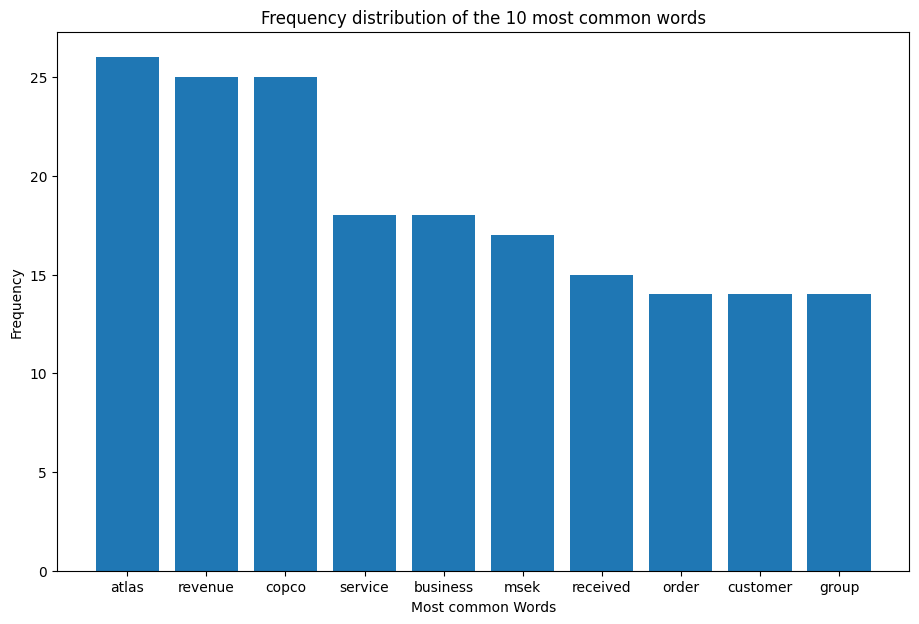

In [20]:
plt.figure(figsize=(11,7))
plt.bar(df_most_common_words_10['Word'], 
        df_most_common_words_10['Frequency'])

plt.xlabel('Most common Words')
plt.ylabel("Frequency")
plt.title("Frequency distribution of the 10 most common words")

plt.show()

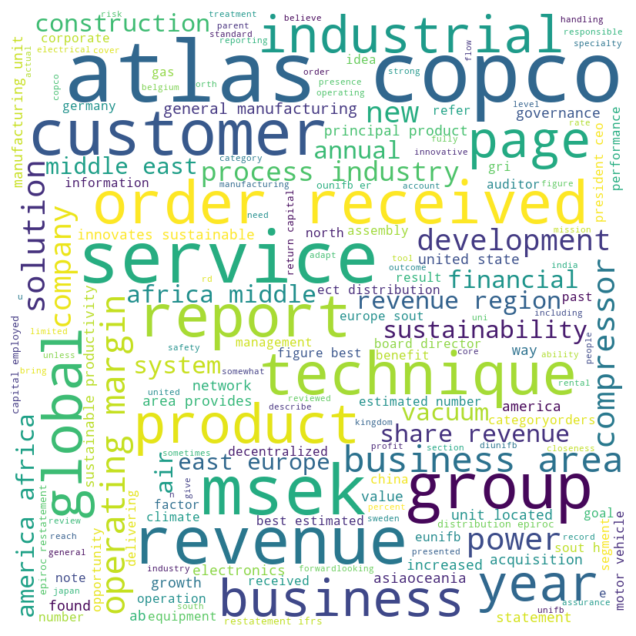

In [21]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(data)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
  
plt.show()

In [ ]:
# When we have a dataframe with a column of text, we can use the following code
# With this code we can create a corpus with all the text in the column
text_corpus = df['Reviews_cleaned_wo_single_char'].str.cat(sep=' ')

text_corpus

In [23]:
def multiple_word_remove_func(text, words_2_remove_list):
    '''
    Removes certain words from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes the defined words from the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
        words_2_remove_list (list): Words to be removed from the text, list of strings
    
    Returns:
        String with removed words
    '''     
    words_to_remove_list = words_2_remove_list
    
    words = word_tokenize(text)
    text = ' '.join([word for word in words if word not in words_to_remove_list])
    return text

In [33]:
def most_freq_word_func(text, n_words=5):
    '''
    Returns the most frequently used words from a text
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Uses the FreqDist function to determine the word frequency
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        List of the most frequently occurring words (by default = 5)
    ''' 
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Frequency', ascending=False)
    
    n_words = n_words
    most_freq_words_list = list(df_fdist['Word'][0:n_words])
    
    return most_freq_words_list

In [35]:
most_freq_words_list = most_freq_word_func(data, n_words=5)
most_freq_words_list

['atlas', 'revenue', 'copco', 'service', 'business']

In [36]:
# Removing most frequent words
multiple_word_remove_func(data, most_freq_words_list)


'annual report group inside front cover president ceo section contains copcos vision mission strategy structure governance create value stakeholder goal year review administration report section describes copcos annual performance achievement compressor technique vacuum technique industrial technique power technique delivering lasting value sustainable way product people safety wellbeing ethic environment risk risk management opportunity share corporate governance financial result financial statement group note group financial statement parent note parent signature board director audit report financial definition sustainability note group gri index auditor limited assurance report ab sustainability report goal performance three year summary contact content audited annual account consolidated accoun t found page corporate governance report examined auditor found page sustainability information reviewed auditor found page belief delivering innovative product reliable pr ofitable growth r

# Getting ESG Scores from Yahoo Finance

In [57]:
import bs4 as bs
import requests
import pickle
import datetime as dt
import pandas as pd
import json
import urllib.request
import yesg


"""
This function gets the ESG scores for the S&P 500 companies and saves them in a csv file.
Return: dataframe with the ESG scores per year per company
"""
# Getting resources from Wikipedia
resource = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
# Parsing the resources
soup = bs.BeautifulSoup(resource.text, 'html.parser')
# Finding the table with the tickers
table = soup.find('table', {'class': 'wikitable sortable'})

# Creating an empty list for the tickers
tickers = []
# Finding all the rows in the table
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)
# Removing the \n from the tickers
tickers = [s.replace('\n', '') for s in tickers]


# Getting the ESG scores for each ticker
dataframes = []
for ticker in tickers:
    try:
        df = pd.DataFrame(yesg.get_historic_esg(ticker))
        df['Company_Symbol'] = ticker
        dataframes.append(df)
    except:
        pass
# Concatenating the dataframes
df = pd.concat(dataframes)

df['timestamp'] = df.index
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

# Removing the non-values
df.dropna(inplace=True)

# Setting dataframe index to timestamp
df['timestamp'] = df.index

# Resetting the index
df.reset_index(drop=True, inplace=True)

# Setting the timestamp as datetime format
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

# Adding the year column to dataframe for calculating the average ESG score per year
df['year'] = df['timestamp'].dt.year


cleaned_df = df.groupby(['year', 'Company_Symbol'])
# Grouping the dataframe by year and ticker
#cleaned_df = df.groupby(['year', 'Company_Symbol']).mean()

# Removing the timestamp column
#cleaned_df.drop(columns=['timestamp'], inplace=True)

# Creating a csv file with the results
#cleaned_df.to_csv('/../data/SP500_EGS_Score_avarage_per_year.csv')

#esg_score = pd.read_csv('/../data/SP500_EGS_Score_avarage_per_year.csv')



An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be 

In [58]:
first_df = df.copy()

In [65]:
"""
def copy_df(df):
    first_df = df.copy()
    return first_df
"""

def calculate_old_scores(first_df, df):
    df_11_2019 = df.query('timestamp == "2019-11-01"').reset_index(drop=True)
    df_11_2019 = df_11_2019.add_suffix('_old')

    df_first_2020 = df.query('timestamp == "2020-01-01"').reset_index(drop=True)
    df_first_2020 = df_first_2020.add_suffix('_new')

    before_11_19_df = df.query('timestamp < "2019-11-01"').reset_index(drop=True)
    before_11_19_df = before_11_19_df.groupby(['year', 'Company_Symbol']).mean()
    before_11_19_df.reset_index(inplace=True)

    years = [2014, 2015, 2016, 2017, 2018, 2019]
    old_datasets = []
    for year in years:
        old_year_df = before_11_19_df.loc[before_11_19_df['year'] == year]
        old_datasets.append(old_year_df)

    df_2014 = pd.DataFrame(old_datasets[0])
    df_2014 = df_2014.add_suffix('_2014')

    merged_calculation = pd.merge(df_11_2019, df_first_2020, left_on='Company_Symbol_old', right_on='Company_Symbol_new', how='inner')
    merged_calculation.drop(columns=['Company_Symbol_new', 'timestamp_new', 'timestamp_old', 'year_old', 'year_new'], inplace=True)

    merged_2014 = pd.merge(merged_calculation, df_2014, left_on='Company_Symbol_old', right_on='Company_Symbol_2014', how='inner')
    merged_2014['Total-Score_after'] = ((merged_2014['Total-Score_old'] * merged_2014['Total-Score_new']) / merged_2014['Total-Score_2014']).round(2)
    merged_2014['E-Score_after'] = ((merged_2014['E-Score_old'] * merged_2014['E-Score_new']) / merged_2014['E-Score_2014']).round(2)
    merged_2014['S-Score_after'] = ((merged_2014['S-Score_old'] * merged_2014['S-Score_new']) / merged_2014['S-Score_2014']).round(2)
    merged_2014['G-Score_after'] = ((merged_2014['G-Score_old'] * merged_2014['G-Score_new']) / merged_2014['G-Score_2014']).round(2)

    df_2014_new = merged_2014[['Company_Symbol_old', 'Total-Score_after', 'E-Score_after', 'S-Score_after', 'G-Score_after', 'year_2014']]
    df_2014_new.rename(columns={'Company_Symbol_old': 'Company_Symbol', 'year_2014': 'year'}, inplace=True)

    df_2015 = pd.DataFrame(old_datasets[1])
    df_2015 = df_2015.add_suffix('_2015')

    df_2016 = pd.DataFrame(old_datasets[2])
    df_2016 = df_2016.add_suffix('_2016')

    df_2017 = pd.DataFrame(old_datasets[3])
    df_2017 = df_2017.add_suffix('_2017')

    df_2018 = pd.DataFrame(old_datasets[4])
    df_2018 = df_2018.add_suffix('_2018')

    df_2019 = pd.DataFrame(old_datasets[5])
    df_2019 = df_2019.add_suffix('_2019')


    def new_esg_calculation(df, merged_calculation, year):
        merged_year = pd.merge(merged_calculation, df, left_on='Company_Symbol_old', right_on='Company_Symbol_'+str(year), how='inner')

        merged_year['Total-Score_after'] = ((merged_year['Total-Score_old'] * merged_year['Total-Score_new']) / merged_year['Total-Score_'+str(year)]).round(2)
        merged_year['E-Score_after'] = ((merged_year['E-Score_old'] * merged_year['E-Score_new']) / merged_year['E-Score_'+str(year)]).round(2)
        merged_year['S-Score_after'] = ((merged_year['S-Score_old'] * merged_year['S-Score_new']) / merged_year['S-Score_'+str(year)]).round(2)
        merged_year['G-Score_after'] = ((merged_year['G-Score_old'] * merged_year['G-Score_new']) / merged_year['G-Score_'+str(year)]).round(2)

        df_new_year = merged_year[['Company_Symbol_old', 'Total-Score_after', 'E-Score_after', 'S-Score_after', 'G-Score_after', 'year_'+str(year)]]

        df_new_year.rename(columns={'Company_Symbol_old': 'Company_Symbol', 'year_2014': 'year'}, inplace=True)

        return df_new_year
    
    df_list = [df_2015, df_2016, df_2017, df_2018, df_2019]
    df_year = [2015, 2016, 2017, 2018, 2019]
    list_of_df = []
    for df, year in zip(df_list, df_year):
        list_of_df.append(new_esg_calculation(df, merged_calculation, year))

    
    df_2015_new = list_of_df[0]
    df_2016_new = list_of_df[1]
    df_2017_new = list_of_df[2]
    df_2018_new = list_of_df[3]
    df_2019_new = list_of_df[4]


    df_2014_new.rename(columns={'Total-Score_after' : 'Total-Score',
                            'E-Score_after': 'E-Score',
                            'G-Score_after': 'G-Score',
                            'S-Score_after': 'S-Score'}, inplace=True)
    
    df_2015_new.rename(columns={'Total-Score_after' : 'Total-Score',
                            'E-Score_after': 'E-Score',
                            'G-Score_after': 'G-Score',
                            'S-Score_after': 'S-Score',
                            'year_2015' : 'year'}, inplace=True)

    df_2016_new.rename(columns={'Total-Score_after' : 'Total-Score',
                            'E-Score_after': 'E-Score',
                            'G-Score_after': 'G-Score',
                            'S-Score_after': 'S-Score',
                            'year_2016' : 'year'}, inplace=True)

    df_2017_new.rename(columns={'Total-Score_after' : 'Total-Score',
                            'E-Score_after': 'E-Score',
                            'G-Score_after': 'G-Score',
                            'S-Score_after': 'S-Score',
                            'year_2017' : 'year'}, inplace=True)

    df_2018_new.rename(columns={'Total-Score_after' : 'Total-Score',
                            'E-Score_after': 'E-Score',
                            'G-Score_after': 'G-Score',
                            'S-Score_after': 'S-Score',
                            'year_2018' : 'year'}, inplace=True)

    df_2019_new.rename(columns={'Total-Score_after' : 'Total-Score',
                            'E-Score_after': 'E-Score',
                            'G-Score_after': 'G-Score',
                            'S-Score_after': 'S-Score',
                            'year_2019' : 'year'}, inplace=True)

    new_before_11_19_df = pd.concat([df_2014_new, df_2015_new, df_2016_new, df_2017_new, df_2018_new, df_2019_new])

    after_11_19_df = first_df.query('timestamp > "2019-12-01"').reset_index(drop=True)

    after_11_19_df = after_11_19_df.groupby(['year', 'Company_Symbol']).mean().reset_index()

    after_11_19_df.drop(columns=['timestamp'], inplace=True)

    after_11_19_df[['Total-Score', 'E-Score', 'S-Score', 'G-Score']] = after_11_19_df[['Total-Score', 'E-Score', 'S-Score', 'G-Score']].round(2)

    after_11_19_df = after_11_19_df[[ col for col in after_11_19_df.columns if col != 'year' ] + ['year']] 

    new_scores = pd.concat([new_before_11_19_df, after_11_19_df])

    new_scores = new_scores[ ['year'] + [ col for col in new_scores.columns if col != 'year' ] ]

    new_scores.to_csv('SP500_EGS_Score_avarage_per_year.csv')

    esg_score = pd.read_csv('SP500_EGS_Score_avarage_per_year.csv')

    return esg_score

In [66]:
calculate_old_scores(first_df, df)

/var/folders/m8/ydtrhpvd6k9b792b9lktznb80000gn/T/ipykernel_68010/3353735508.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014_new.rename(columns={'Company_Symbol_old': 'Company_Symbol', 'year_2014': 'year'}, inplace=True)
/var/folders/m8/ydtrhpvd6k9b792b9lktznb80000gn/T/ipykernel_68010/3353735508.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_year.rename(columns={'Company_Symbol_old': 'Company_Symbol', 'year_2014': 'year'}, inplace=True)
/var/folders/m8/ydtrhpvd6k9b792b9lktznb80000gn/T/ipykernel_68010/3353735508.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,Unnamed: 0,year,Company_Symbol,Total-Score,E-Score,S-Score,G-Score
0,0,2014,MMM,30.49,10.72,10.79,8.84
1,1,2014,ABT,30.18,3.71,15.83,10.59
2,2,2014,ABBV,30.67,1.12,17.38,10.30
3,3,2014,ACN,15.68,1.03,8.42,5.81
4,4,2014,ATVI,17.80,0.17,11.06,6.36
...,...,...,...,...,...,...,...
3986,1507,2023,WYNN,26.49,3.55,11.98,10.96
3987,1508,2023,XEL,23.80,12.87,6.75,4.18
3988,1509,2023,XRAY,15.78,2.21,6.86,6.71
3989,1510,2023,XYL,16.04,3.56,7.40,5.08


In [3]:
df_11_2019 = df.query('timestamp == "2019-11-01"').reset_index(drop=True)
df_11_2019 = df_11_2019.add_suffix('_old')
df_11_2019


,Total-Score_old,E-Score_old,S-Score_old,G-Score_old,Company_Symbol_old,timestamp_old,year_old
0,64.24,61.89,62.86,69.95,MMM,2019-11-01,2019
1,46.61,44.04,41.00,58.59,AOS,2019-11-01,2019
2,63.07,70.50,58.93,63.08,ABT,2019-11-01,2019
3,65.17,81.72,63.31,54.16,ABBV,2019-11-01,2019
4,73.71,82.67,67.88,73.45,ACN,2019-11-01,2019
...,...,...,...,...,...,...,...
418,73.20,66.72,77.55,79.65,XEL,2019-11-01,2019
419,78.26,85.90,72.88,73.55,XYL,2019-11-01,2019
420,58.56,59.03,53.05,65.52,YUM,2019-11-01,2019
421,60.47,75.50,54.34,57.15,ZBH,2019-11-01,2019


In [4]:
df_first_2020 = df.query('timestamp == "2020-01-01"').reset_index(drop=True)
df_first_2020 = df_first_2020.add_suffix('_new')
df_first_2020

,Total-Score_new,E-Score_new,S-Score_new,G-Score_new,Company_Symbol_new,timestamp_new,year_new
0,34.53,12.60,12.70,9.23,MMM,2020-01-01,2020
1,25.14,13.60,4.27,7.27,AOS,2020-01-01,2020
2,30.62,3.74,15.31,11.58,ABT,2020-01-01,2020
3,30.35,0.96,16.54,12.84,ABBV,2020-01-01,2020
4,15.32,0.96,8.19,6.17,ACN,2020-01-01,2020
...,...,...,...,...,...,...,...
422,28.97,14.74,8.40,5.83,XEL,2020-01-01,2020
423,18.13,2.82,9.91,5.40,XYL,2020-01-01,2020
424,20.26,4.09,10.86,5.32,YUM,2020-01-01,2020
425,33.71,3.80,18.46,11.47,ZBH,2020-01-01,2020


In [5]:
before_11_19_df = df.query('timestamp < "2019-11-01"').reset_index(drop=True)


In [6]:
before_11_19_df = before_11_19_df.groupby(['year', 'Company_Symbol']).mean()
before_11_19_df.reset_index(inplace=True)
before_11_19_df


,year,Company_Symbol,Total-Score,E-Score,S-Score,G-Score,timestamp
0,2014,A,72.500,83.000,73.000,63.000,2014-10-16 12:00:00
1,2014,AAL,72.750,77.000,67.000,75.250,2014-10-16 12:00:00
2,2014,AAPL,60.750,74.000,45.000,62.000,2014-10-16 12:00:00
3,2014,ABBV,64.500,70.250,60.250,67.500,2014-10-16 12:00:00
4,2014,ABT,64.000,71.000,57.000,69.000,2014-10-16 12:00:00
...,...,...,...,...,...,...,...
2501,2019,XRAY,57.250,66.300,49.490,61.347,2019-05-17 00:00:00
2502,2019,XYL,78.234,85.900,73.587,72.450,2019-05-17 00:00:00
2503,2019,YUM,58.280,58.832,53.050,64.720,2019-05-17 00:00:00
2504,2019,ZBH,59.518,75.500,55.116,52.821,2019-05-17 00:00:00


In [7]:
years = [2014, 2015, 2016, 2017, 2018, 2019]
old_datasets = []
for year in years:
    old_year_df = before_11_19_df.loc[before_11_19_df['year'] == year]
    old_datasets.append(old_year_df)

In [8]:
df_2014 = pd.DataFrame(old_datasets[0])
df_2014 = df_2014.add_suffix('_2014')
df_2014

,year_2014,Company_Symbol_2014,Total-Score_2014,E-Score_2014,S-Score_2014,G-Score_2014,timestamp_2014
0,2014,A,72.50,83.00,73.00,63.00,2014-10-16 12:00:00
1,2014,AAL,72.75,77.00,67.00,75.25,2014-10-16 12:00:00
2,2014,AAPL,60.75,74.00,45.00,62.00,2014-10-16 12:00:00
3,2014,ABBV,64.50,70.25,60.25,67.50,2014-10-16 12:00:00
4,2014,ABT,64.00,71.00,57.00,69.00,2014-10-16 12:00:00
...,...,...,...,...,...,...,...
394,2014,XYL,64.75,61.00,61.00,76.00,2014-10-16 12:00:00
395,2014,YUM,58.00,51.75,61.50,64.00,2014-10-16 12:00:00
396,2014,ZBH,61.00,65.00,56.00,64.00,2014-10-16 12:00:00
397,2014,ZION,47.00,33.00,56.00,50.00,2014-10-16 12:00:00


In [9]:
merged_calculation = pd.merge(df_11_2019, df_first_2020, left_on='Company_Symbol_old', right_on='Company_Symbol_new', how='inner')

In [10]:
merged_calculation.drop(columns=['Company_Symbol_new', 'timestamp_new', 'timestamp_old', 'year_old', 'year_new'], inplace=True)

In [11]:
merged_calculation

,Total-Score_old,E-Score_old,S-Score_old,G-Score_old,Company_Symbol_old,Total-Score_new,E-Score_new,S-Score_new,G-Score_new
0,64.24,61.89,62.86,69.95,MMM,34.53,12.60,12.70,9.23
1,46.61,44.04,41.00,58.59,AOS,25.14,13.60,4.27,7.27
2,63.07,70.50,58.93,63.08,ABT,30.62,3.74,15.31,11.58
3,65.17,81.72,63.31,54.16,ABBV,30.35,0.96,16.54,12.84
4,73.71,82.67,67.88,73.45,ACN,15.32,0.96,8.19,6.17
...,...,...,...,...,...,...,...,...,...
418,73.20,66.72,77.55,79.65,XEL,28.97,14.74,8.40,5.83
419,78.26,85.90,72.88,73.55,XYL,18.13,2.82,9.91,5.40
420,58.56,59.03,53.05,65.52,YUM,20.26,4.09,10.86,5.32
421,60.47,75.50,54.34,57.15,ZBH,33.71,3.80,18.46,11.47


In [12]:
merged_2014 = pd.merge(merged_calculation, df_2014, left_on='Company_Symbol_old', right_on='Company_Symbol_2014', how='inner')
merged_2014

,Total-Score_old,E-Score_old,S-Score_old,G-Score_old,Company_Symbol_old,Total-Score_new,E-Score_new,S-Score_new,G-Score_new,year_2014,Company_Symbol_2014,Total-Score_2014,E-Score_2014,S-Score_2014,G-Score_2014,timestamp_2014
0,64.24,61.89,62.86,69.95,MMM,34.53,12.60,12.70,9.23,2014,MMM,72.75,72.75,74.00,73.0,2014-10-16 12:00:00
1,63.07,70.50,58.93,63.08,ABT,30.62,3.74,15.31,11.58,2014,ABT,64.00,71.00,57.00,69.0,2014-10-16 12:00:00
2,65.17,81.72,63.31,54.16,ABBV,30.35,0.96,16.54,12.84,2014,ABBV,64.50,70.25,60.25,67.5,2014-10-16 12:00:00
3,73.71,82.67,67.88,73.45,ACN,15.32,0.96,8.19,6.17,2014,ACN,72.00,77.00,66.00,78.0,2014-10-16 12:00:00
4,49.00,45.83,47.57,55.39,ATVI,16.71,0.15,10.46,6.09,2014,ATVI,46.00,40.00,45.00,53.0,2014-10-16 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,73.20,66.72,77.55,79.65,XEL,28.97,14.74,8.40,5.83,2014,XEL,71.75,63.75,78.00,80.0,2014-10-16 12:00:00
391,78.26,85.90,72.88,73.55,XYL,18.13,2.82,9.91,5.40,2014,XYL,64.75,61.00,61.00,76.0,2014-10-16 12:00:00
392,58.56,59.03,53.05,65.52,YUM,20.26,4.09,10.86,5.32,2014,YUM,58.00,51.75,61.50,64.0,2014-10-16 12:00:00
393,60.47,75.50,54.34,57.15,ZBH,33.71,3.80,18.46,11.47,2014,ZBH,61.00,65.00,56.00,64.0,2014-10-16 12:00:00


In [13]:
merged_2014['Total-Score_after'] = ((merged_2014['Total-Score_old'] * merged_2014['Total-Score_new']) / merged_2014['Total-Score_2014']).round(2)
merged_2014['E-Score_after'] = ((merged_2014['E-Score_old'] * merged_2014['E-Score_new']) / merged_2014['E-Score_2014']).round(2)
merged_2014['S-Score_after'] = ((merged_2014['S-Score_old'] * merged_2014['S-Score_new']) / merged_2014['S-Score_2014']).round(2)
merged_2014['G-Score_after'] = ((merged_2014['G-Score_old'] * merged_2014['G-Score_new']) / merged_2014['G-Score_2014']).round(2)

In [14]:
merged_2014

,Total-Score_old,E-Score_old,S-Score_old,G-Score_old,Company_Symbol_old,Total-Score_new,E-Score_new,S-Score_new,G-Score_new,year_2014,Company_Symbol_2014,Total-Score_2014,E-Score_2014,S-Score_2014,G-Score_2014,timestamp_2014,Total-Score_after,E-Score_after,S-Score_after,G-Score_after
0,64.24,61.89,62.86,69.95,MMM,34.53,12.60,12.70,9.23,2014,MMM,72.75,72.75,74.00,73.0,2014-10-16 12:00:00,30.49,10.72,10.79,8.84
1,63.07,70.50,58.93,63.08,ABT,30.62,3.74,15.31,11.58,2014,ABT,64.00,71.00,57.00,69.0,2014-10-16 12:00:00,30.18,3.71,15.83,10.59
2,65.17,81.72,63.31,54.16,ABBV,30.35,0.96,16.54,12.84,2014,ABBV,64.50,70.25,60.25,67.5,2014-10-16 12:00:00,30.67,1.12,17.38,10.30
3,73.71,82.67,67.88,73.45,ACN,15.32,0.96,8.19,6.17,2014,ACN,72.00,77.00,66.00,78.0,2014-10-16 12:00:00,15.68,1.03,8.42,5.81
4,49.00,45.83,47.57,55.39,ATVI,16.71,0.15,10.46,6.09,2014,ATVI,46.00,40.00,45.00,53.0,2014-10-16 12:00:00,17.80,0.17,11.06,6.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,73.20,66.72,77.55,79.65,XEL,28.97,14.74,8.40,5.83,2014,XEL,71.75,63.75,78.00,80.0,2014-10-16 12:00:00,29.56,15.43,8.35,5.80
391,78.26,85.90,72.88,73.55,XYL,18.13,2.82,9.91,5.40,2014,XYL,64.75,61.00,61.00,76.0,2014-10-16 12:00:00,21.91,3.97,11.84,5.23
392,58.56,59.03,53.05,65.52,YUM,20.26,4.09,10.86,5.32,2014,YUM,58.00,51.75,61.50,64.0,2014-10-16 12:00:00,20.46,4.67,9.37,5.45
393,60.47,75.50,54.34,57.15,ZBH,33.71,3.80,18.46,11.47,2014,ZBH,61.00,65.00,56.00,64.0,2014-10-16 12:00:00,33.42,4.41,17.91,10.24


In [15]:
df_2014_new = merged_2014[['Company_Symbol_old', 'Total-Score_after', 'E-Score_after', 'S-Score_after', 'G-Score_after', 'year_2014']]

In [16]:
df_2014_new.rename(columns={'Company_Symbol_old': 'Company_Symbol', 'year_2014': 'year'}, inplace=True)

/var/folders/m8/ydtrhpvd6k9b792b9lktznb80000gn/T/ipykernel_68010/2874543672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014_new.rename(columns={'Company_Symbol_old': 'Company_Symbol', 'year_2014': 'year'}, inplace=True)


In [17]:
df_2014_new

,Company_Symbol,Total-Score_after,E-Score_after,S-Score_after,G-Score_after,year
0,MMM,30.49,10.72,10.79,8.84,2014
1,ABT,30.18,3.71,15.83,10.59,2014
2,ABBV,30.67,1.12,17.38,10.30,2014
3,ACN,15.68,1.03,8.42,5.81,2014
4,ATVI,17.80,0.17,11.06,6.36,2014
...,...,...,...,...,...,...
390,XEL,29.56,15.43,8.35,5.80,2014
391,XYL,21.91,3.97,11.84,5.23,2014
392,YUM,20.46,4.67,9.37,5.45,2014
393,ZBH,33.42,4.41,17.91,10.24,2014


In [18]:
df_2015 = pd.DataFrame(old_datasets[1])
df_2015 = df_2015.add_suffix('_2015')

df_2016 = pd.DataFrame(old_datasets[2])
df_2016 = df_2016.add_suffix('_2016')

df_2017 = pd.DataFrame(old_datasets[3])
df_2017 = df_2017.add_suffix('_2017')

df_2018 = pd.DataFrame(old_datasets[4])
df_2018 = df_2018.add_suffix('_2018')

df_2019 = pd.DataFrame(old_datasets[5])
df_2019 = df_2019.add_suffix('_2019')


In [19]:
# Calculation function
def new_esg_calculation(df, merged_calculation, year):
    merged_year = pd.merge(merged_calculation, df, left_on='Company_Symbol_old', right_on='Company_Symbol_'+str(year), how='inner')

    merged_year['Total-Score_after'] = ((merged_year['Total-Score_old'] * merged_year['Total-Score_new']) / merged_year['Total-Score_'+str(year)]).round(2)
    merged_year['E-Score_after'] = ((merged_year['E-Score_old'] * merged_year['E-Score_new']) / merged_year['E-Score_'+str(year)]).round(2)
    merged_year['S-Score_after'] = ((merged_year['S-Score_old'] * merged_year['S-Score_new']) / merged_year['S-Score_'+str(year)]).round(2)
    merged_year['G-Score_after'] = ((merged_year['G-Score_old'] * merged_year['G-Score_new']) / merged_year['G-Score_'+str(year)]).round(2)

    df_new_year = merged_year[['Company_Symbol_old', 'Total-Score_after', 'E-Score_after', 'S-Score_after', 'G-Score_after', 'year_'+str(year)]]

    df_new_year.rename(columns={'Company_Symbol_old': 'Company_Symbol', 'year_2014': 'year'}, inplace=True)

    return df_new_year


In [20]:
df_list = [df_2015, df_2016, df_2017, df_2018, df_2019]
df_year = [2015, 2016, 2017, 2018, 2019]
list_of_df = []
for df, year in zip(df_list, df_year):
    list_of_df.append(new_esg_calculation(df, merged_calculation, year))

#new_esg_calculation(df_2015, merged_calculation, 2015)

/var/folders/m8/ydtrhpvd6k9b792b9lktznb80000gn/T/ipykernel_68010/1309377718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_year.rename(columns={'Company_Symbol_old': 'Company_Symbol', 'year_2014': 'year'}, inplace=True)
/var/folders/m8/ydtrhpvd6k9b792b9lktznb80000gn/T/ipykernel_68010/1309377718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_year.rename(columns={'Company_Symbol_old': 'Company_Symbol', 'year_2014': 'year'}, inplace=True)
/var/folders/m8/ydtrhpvd6k9b792b9lktznb80000gn/T/ipykernel_68010/1309377718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [21]:
df_2015_new = list_of_df[0]
df_2016_new = list_of_df[1]
df_2017_new = list_of_df[2]
df_2018_new = list_of_df[3]
df_2019_new = list_of_df[4]


In [22]:
df_2014_new.rename(columns={'Total-Score_after' : 'Total-Score',
                            'E-Score_after': 'E-Score',
                            'G-Score_after': 'G-Score',
                            'S-Score_after': 'S-Score'}, inplace=True)

/var/folders/m8/ydtrhpvd6k9b792b9lktznb80000gn/T/ipykernel_68010/1371731895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014_new.rename(columns={'Total-Score_after' : 'Total-Score',


In [23]:
df_2015_new.rename(columns={'Total-Score_after' : 'Total-Score',
                            'E-Score_after': 'E-Score',
                            'G-Score_after': 'G-Score',
                            'S-Score_after': 'S-Score',
                            'year_2015' : 'year'}, inplace=True)


In [24]:
df_2016_new.rename(columns={'Total-Score_after' : 'Total-Score',
                            'E-Score_after': 'E-Score',
                            'G-Score_after': 'G-Score',
                            'S-Score_after': 'S-Score',
                            'year_2016' : 'year'}, inplace=True)

df_2017_new.rename(columns={'Total-Score_after' : 'Total-Score',
                            'E-Score_after': 'E-Score',
                            'G-Score_after': 'G-Score',
                            'S-Score_after': 'S-Score',
                            'year_2017' : 'year'}, inplace=True)

df_2018_new.rename(columns={'Total-Score_after' : 'Total-Score',
                            'E-Score_after': 'E-Score',
                            'G-Score_after': 'G-Score',
                            'S-Score_after': 'S-Score',
                            'year_2018' : 'year'}, inplace=True)

df_2019_new.rename(columns={'Total-Score_after' : 'Total-Score',
                            'E-Score_after': 'E-Score',
                            'G-Score_after': 'G-Score',
                            'S-Score_after': 'S-Score',
                            'year_2019' : 'year'}, inplace=True)



In [25]:
new_before_11_19_df = pd.concat([df_2014_new, df_2015_new, df_2016_new, df_2017_new, df_2018_new, df_2019_new])

In [26]:
new_before_11_19_df

,Company_Symbol,Total-Score,E-Score,S-Score,G-Score,year
0,MMM,30.49,10.72,10.79,8.84,2014
1,ABT,30.18,3.71,15.83,10.59,2014
2,ABBV,30.67,1.12,17.38,10.30,2014
3,ACN,15.68,1.03,8.42,5.81,2014
4,ATVI,17.80,0.17,11.06,6.36,2014
...,...,...,...,...,...,...
418,XEL,29.04,14.82,8.36,5.86,2019
419,XYL,18.14,2.82,9.81,5.48,2019
420,YUM,20.36,4.10,10.86,5.39,2019
421,ZBH,34.25,3.80,18.20,12.41,2019


In [30]:
after_11_19_df = first_df.query('timestamp > "2019-12-01"').reset_index(drop=True)


In [34]:
after_11_19_df = after_11_19_df.groupby(['year', 'Company_Symbol']).mean().reset_index()

In [36]:
after_11_19_df.drop(columns=['timestamp'], inplace=True)

In [43]:
after_11_19_df[['Total-Score', 'E-Score', 'S-Score', 'G-Score']] = after_11_19_df[['Total-Score', 'E-Score', 'S-Score', 'G-Score']].round(2)

In [46]:
after_11_19_df = after_11_19_df[[ col for col in after_11_19_df.columns if col != 'year' ] + ['year']] 


In [47]:
after_11_19_df

,Company_Symbol,Total-Score,E-Score,S-Score,G-Score,year
0,A,17.14,0.87,9.42,6.86,2020
1,AAL,30.89,11.15,14.04,5.70,2020
2,AAPL,23.72,0.52,12.99,10.21,2020
3,ABBV,30.56,0.96,17.05,12.54,2020
4,ABT,30.34,3.36,15.86,11.11,2020
...,...,...,...,...,...,...
1507,WYNN,26.49,3.55,11.98,10.96,2023
1508,XEL,23.80,12.87,6.75,4.18,2023
1509,XRAY,15.78,2.21,6.86,6.71,2023
1510,XYL,16.04,3.56,7.40,5.08,2023


In [48]:
new_before_11_19_df

,Company_Symbol,Total-Score,E-Score,S-Score,G-Score,year
0,MMM,30.49,10.72,10.79,8.84,2014
1,ABT,30.18,3.71,15.83,10.59,2014
2,ABBV,30.67,1.12,17.38,10.30,2014
3,ACN,15.68,1.03,8.42,5.81,2014
4,ATVI,17.80,0.17,11.06,6.36,2014
...,...,...,...,...,...,...
418,XEL,29.04,14.82,8.36,5.86,2019
419,XYL,18.14,2.82,9.81,5.48,2019
420,YUM,20.36,4.10,10.86,5.39,2019
421,ZBH,34.25,3.80,18.20,12.41,2019


In [49]:
new_scores = pd.concat([new_before_11_19_df, after_11_19_df])

In [50]:
new_scores

,Company_Symbol,Total-Score,E-Score,S-Score,G-Score,year
0,MMM,30.49,10.72,10.79,8.84,2014
1,ABT,30.18,3.71,15.83,10.59,2014
2,ABBV,30.67,1.12,17.38,10.30,2014
3,ACN,15.68,1.03,8.42,5.81,2014
4,ATVI,17.80,0.17,11.06,6.36,2014
...,...,...,...,...,...,...
1507,WYNN,26.49,3.55,11.98,10.96,2023
1508,XEL,23.80,12.87,6.75,4.18,2023
1509,XRAY,15.78,2.21,6.86,6.71,2023
1510,XYL,16.04,3.56,7.40,5.08,2023


In [54]:
new_scores = new_scores[ ['year'] + [ col for col in new_scores.columns if col != 'year' ] ]


In [55]:
new_scores

,year,Company_Symbol,Total-Score,E-Score,S-Score,G-Score
0,2014,MMM,30.49,10.72,10.79,8.84
1,2014,ABT,30.18,3.71,15.83,10.59
2,2014,ABBV,30.67,1.12,17.38,10.30
3,2014,ACN,15.68,1.03,8.42,5.81
4,2014,ATVI,17.80,0.17,11.06,6.36
...,...,...,...,...,...,...
1507,2023,WYNN,26.49,3.55,11.98,10.96
1508,2023,XEL,23.80,12.87,6.75,4.18
1509,2023,XRAY,15.78,2.21,6.86,6.71
1510,2023,XYL,16.04,3.56,7.40,5.08


In [56]:
new_scores.to_csv('SP500_EGS_Score_avarage_per_year.csv')

In [29]:
first_df

,Total-Score,E-Score,S-Score,G-Score,Company_Symbol,timestamp,year
0,73.00,73.00,74.00,73.00,MMM,2014-09-01,2014
1,72.00,72.00,74.00,73.00,MMM,2014-10-01,2014
2,73.00,73.00,74.00,73.00,MMM,2014-11-01,2014
3,73.00,73.00,74.00,73.00,MMM,2014-12-01,2014
4,74.00,70.00,76.00,78.00,MMM,2015-01-01,2015
...,...,...,...,...,...,...,...
32740,19.07,1.51,8.27,9.29,ZTS,2021-05-01,2021
32741,18.27,1.38,7.70,9.19,ZTS,2021-09-01,2021
32742,18.18,1.38,7.70,9.10,ZTS,2022-02-01,2022
32743,18.18,1.38,7.70,9.10,ZTS,2022-05-01,2022


In [28]:
cleaned_df = df.groupby(['year', 'Company_Symbol']).mean()

KeyError: 'year'

In [ ]:
cleaned_df.drop(columns=['timestamp'], inplace=True)

In [ ]:
cleaned_df.reset_index(inplace=True)

In [ ]:
cleaned_df

,year,Company_Symbol,Total-Score,E-Score,S-Score,G-Score
0,2014,A,72.50,83.00,73.00,63.00
1,2014,AAL,72.75,77.00,67.00,75.25
2,2014,AAPL,60.75,74.00,45.00,62.00
3,2014,ABBV,64.50,70.25,60.25,67.50
4,2014,ABT,64.00,71.00,57.00,69.00
...,...,...,...,...,...,...
4017,2023,WYNN,26.49,3.55,11.98,10.96
4018,2023,XEL,23.80,12.87,6.75,4.18
4019,2023,XRAY,15.78,2.21,6.86,6.71
4020,2023,XYL,16.04,3.56,7.40,5.08


In [ ]:
df

,Total-Score,E-Score,S-Score,G-Score,Company_Symbol,timestamp,year
0,73.00,73.00,74.00,73.00,MMM,2014-09-01,2014
1,72.00,72.00,74.00,73.00,MMM,2014-10-01,2014
2,73.00,73.00,74.00,73.00,MMM,2014-11-01,2014
3,73.00,73.00,74.00,73.00,MMM,2014-12-01,2014
4,74.00,70.00,76.00,78.00,MMM,2015-01-01,2015
...,...,...,...,...,...,...,...
32854,19.07,1.51,8.27,9.29,ZTS,2021-05-01,2021
32855,18.27,1.38,7.70,9.19,ZTS,2021-09-01,2021
32856,18.18,1.38,7.70,9.10,ZTS,2022-02-01,2022
32857,18.18,1.38,7.70,9.10,ZTS,2022-05-01,2022


In [ ]:
before_11_19_df = df.query("timestamp < '2019-11-01'")

In [ ]:
before_cleaned_df = before_11_19_df.groupby(['year', 'Company_Symbol']).mean()

In [ ]:
before_cleaned_df.reset_index(inplace=True)

In [ ]:
before_cleaned_df.drop(columns=['timestamp'], inplace=True)

In [ ]:
before_cleaned_df

,year,Company_Symbol,Total-Score,E-Score,S-Score,G-Score
0,2014,A,72.500,83.000,73.000,63.000
1,2014,AAL,72.750,77.000,67.000,75.250
2,2014,AAPL,60.750,74.000,45.000,62.000
3,2014,ABBV,64.500,70.250,60.250,67.500
4,2014,ABT,64.000,71.000,57.000,69.000
...,...,...,...,...,...,...
2509,2019,XRAY,57.250,66.300,49.490,61.347
2510,2019,XYL,78.234,85.900,73.587,72.450
2511,2019,YUM,58.280,58.832,53.050,64.720
2512,2019,ZBH,59.518,75.500,55.116,52.821


In [ ]:
years = [2014, 2015, 2016, 2017, 2018, 2019]
old_datasets = []
for year in years:
    old_year_df = before_cleaned_df.loc[before_cleaned_df['year'] == year]
    old_datasets.append(old_year_df)

In [ ]:
old_datasets[0]

,year,Company_Symbol,Total-Score,E-Score,S-Score,G-Score
0,2014,A,72.50,83.00,73.00,63.00
1,2014,AAL,72.75,77.00,67.00,75.25
2,2014,AAPL,60.75,74.00,45.00,62.00
3,2014,ABBV,64.50,70.25,60.25,67.50
4,2014,ABT,64.00,71.00,57.00,69.00
...,...,...,...,...,...,...
395,2014,XYL,64.75,61.00,61.00,76.00
396,2014,YUM,58.00,51.75,61.50,64.00
397,2014,ZBH,61.00,65.00,56.00,64.00
398,2014,ZION,47.00,33.00,56.00,50.00


In [ ]:
new_2020_df = after_11_19_df.query("timestamp == '2020-01-01'")
new_2020_df


,Total-Score,E-Score,S-Score,G-Score,Company_Symbol,timestamp,year
64,34.53,12.60,12.70,9.23,MMM,2020-01-01,2020
118,25.14,13.60,4.27,7.27,AOS,2020-01-01,2020
197,30.62,3.74,15.31,11.58,ABT,2020-01-01,2020
275,30.35,0.96,16.54,12.84,ABBV,2020-01-01,2020
353,15.32,0.96,8.19,6.17,ACN,2020-01-01,2020
...,...,...,...,...,...,...,...
32479,28.97,14.74,8.40,5.83,XEL,2020-01-01,2020
32558,18.13,2.82,9.91,5.40,XYL,2020-01-01,2020
32637,20.26,4.09,10.86,5.32,YUM,2020-01-01,2020
32715,33.71,3.80,18.46,11.47,ZBH,2020-01-01,2020


Burada ters oranti kullanilarak 11.2019 tarihinden önceki skorlar 12.2019 a göre hesaplayacak fonksiyon yazilacak.

In [ ]:
# Function
